In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import datetime, timedelta
from src.utils.ccrfcd.gridded_products import CCRFCDGriddedProducts, Location


gp           = CCRFCDGriddedProducts()
t0           = datetime(year=2023, month=8, day=21, hour=6)
t0_1         = datetime(year=2023, month=8, day=21, hour=7)
gpe_raw_vals = gp._fetch_all_gauge_qpe(t0, t0_1)

  3%|▎         | 7/231 [00:00<00:03, 67.46it/s]

100%|██████████| 231/231 [00:02<00:00, 80.20it/s]


# Side-by-Side Plots
---

In [52]:
# import matplotlib.colors as mcolors


# def plot_ccrfcd_qpe(gp: CCRFCDGriddedProducts, qpe_grids: np.ndarray, dpi=100) -> None:

#     colors = [
#         "#FFFFFF", "#00FFFF", "#00BFFF", "#00FF00", "#32CD32", "#ADFF2F", "#FFFF00",
#         "#FFD700", "#FFA500", "#FF4500", "#FF0000", "#8B0000", "#FF00FF",
#         "#9400D3", "#4B0082", "#FFFFFF", "#E0FFFF"
#     ]
#     boundaries = [0.0, 0.01, 0.05, 0.10, 0.20, 0.40, 0.60, 0.80, 1.00, 1.25, 1.50, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0]
#     cmap       = mcolors.ListedColormap(colors)
#     norm       = mcolors.BoundaryNorm(boundaries, cmap.N, extend='max')

#     fig = plt.figure(figsize=(10, 10), dpi=dpi)
#     ax  = plt.axes(projection=ccrs.PlateCarree())

#     # bound to LV valley
#     ax.set_extent([gp._LON_MIN, gp._LON_MAX, gp._LAT_MIN, gp._LAT_MAX], crs=ccrs.PlateCarree())
#     ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
#     ax.add_feature(cfeature.BORDERS, linestyle=':')

#     lat_bins = np.arange(gp._LAT_MIN, gp._LAT_MAX + gp._DLAT, gp._DLAT)
#     lon_bins = np.arange(gp._LON_MIN, gp._LON_MAX + gp._DLON, gp._DLON)
#     mesh     = ax.pcolormesh(lon_bins, lat_bins, qpe_grids, transform=ccrs.PlateCarree(), cmap=cmap)

#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#     sm.set_array([])
    
#     cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.806, pad=0.05)
#     cbar.set_label('Rain guage-est. QPE (inches)')
#     cbar.set_ticks(boundaries)
#     cbar.set_ticklabels([str(b) for b in boundaries])
    
#     plt.show()


# plot_ccrfcd_qpe(gp, qpe_grids)

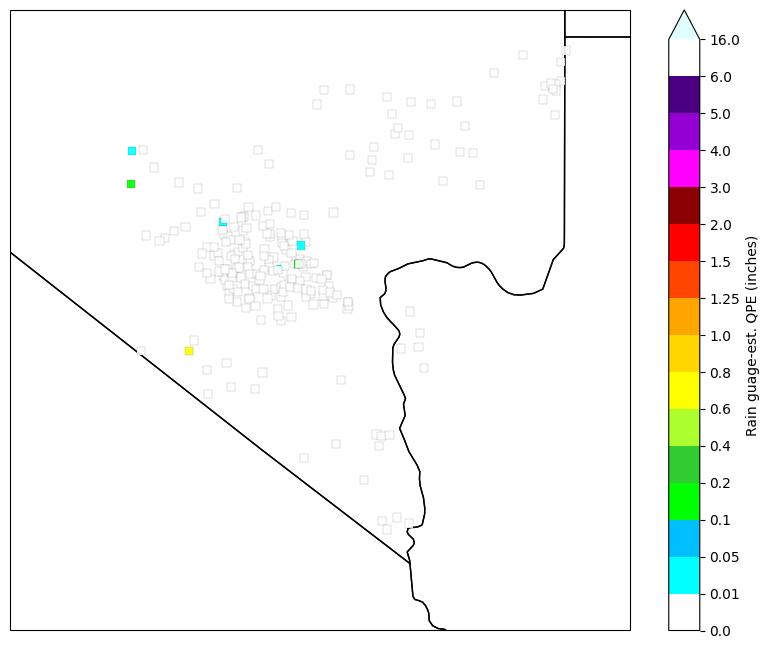

In [53]:
import matplotlib.colors as mcolors
from typing import Tuple, Optional


def plot_ccrfcd_qpe_gauges(gp: CCRFCDGriddedProducts, gpe_raw_vals: dict, dpi=100) -> None:

    colors = [
        "#FFFFFF", "#00FFFF", "#00BFFF", "#00FF00", "#32CD32", "#ADFF2F", "#FFFF00",
        "#FFD700", "#FFA500", "#FF4500", "#FF0000", "#8B0000", "#FF00FF",
        "#9400D3", "#4B0082", "#FFFFFF", "#E0FFFF"
    ]
    boundaries = [0.0, 0.01, 0.05, 0.10, 0.20, 0.40, 0.60, 0.80, 1.00, 1.25, 1.50, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0]
    cmap       = mcolors.ListedColormap(colors)
    norm       = mcolors.BoundaryNorm(boundaries, cmap.N, extend='max')

    g_lons = []
    g_lats = []
    g_vals = []
    g_ids  = []

    for item in gpe_raw_vals:

        g_lons.append(item["lon"])
        g_lats.append(item["lat"])
        g_vals.append(item["qpe"])
        g_ids.append(item["station_id"])

    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax  = plt.axes(projection=ccrs.PlateCarree())

    # bound to LV valley
    ax.set_extent([gp._LON_MIN, gp._LON_MAX, gp._LAT_MIN, gp._LAT_MAX], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    lat_bins = np.arange(gp._LAT_MIN, gp._LAT_MAX + gp._DLAT, gp._DLAT)
    lon_bins = np.arange(gp._LON_MIN, gp._LON_MAX + gp._DLON, gp._DLON)

    # mesh     = ax.pcolormesh(lon_bins, lat_bins, qpe_grids, transform=ccrs.PlateCarree(), cmap=cmap)

    sc = ax.scatter(
        g_lons,
        g_lats,
        c=g_vals,
        cmap=cmap,
        norm=norm,
        edgecolors="black",
        linewidths=0.10,
        s=35,
        alpha=.90,
        marker='s',
        transform=ccrs.PlateCarree(),
        zorder=5
    )

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.806, pad=0.05)
    cbar.set_label('Rain guage-est. QPE (inches)')
    cbar.set_ticks(boundaries)
    cbar.set_ticklabels([str(b) for b in boundaries])
    
    plt.show()


plot_ccrfcd_qpe_gauges(gp, gpe_raw_vals)

In [ ]:
gpe_raw_vals

In [9]:
from src.mrms_qpe.fetch_mrms_qpe import MRMSQPEClient


client = MRMSQPEClient()

# PDT (UTC -7) -> UTC
xarr = client.fetch_radar_only_qpe_1hr(end_time=t0_1, time_zone="PDT")

Ignoring index file 'MRMS_RadarOnly_QPE_01H_00.00_20230821-110000.grib2.5b7b6.idx' older than GRIB file
/home/mufan/miniforge3/envs/torp/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


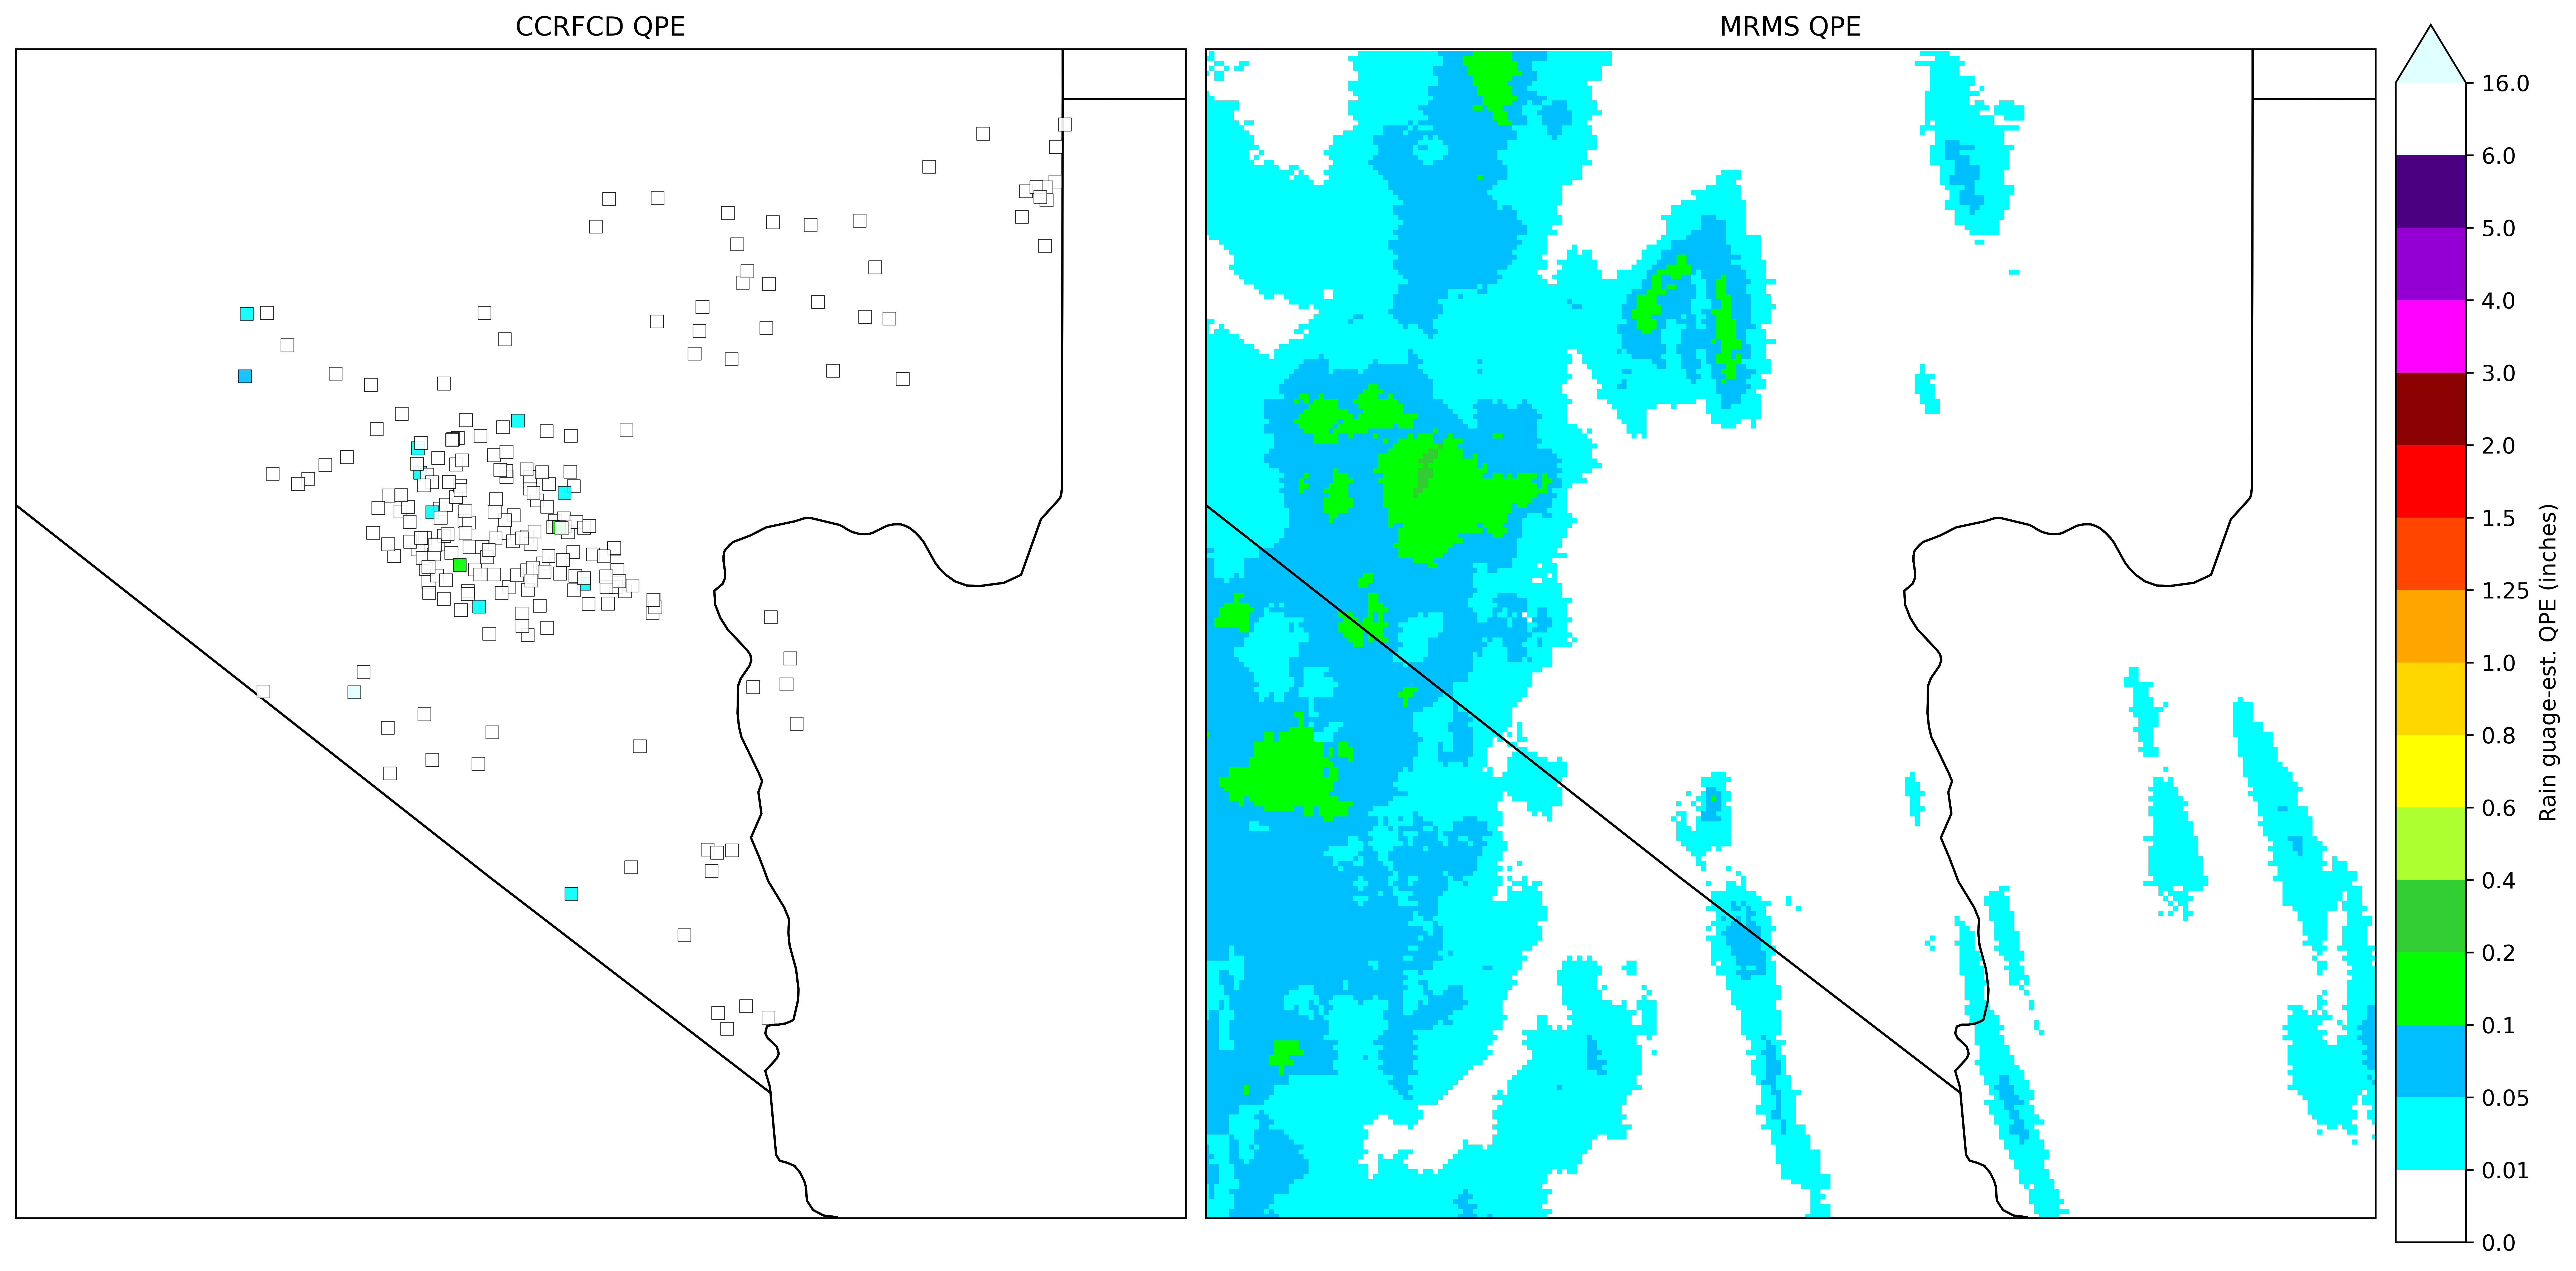

In [10]:
def plot_mrms_ccrfcd_qpe(gp, gpe_raw_vals, xarr, dpi=600):

    colors = [
        "#FFFFFF", "#00FFFF", "#00BFFF", "#00FF00", "#32CD32", "#ADFF2F", "#FFFF00",
        "#FFD700", "#FFA500", "#FF4500", "#FF0000", "#8B0000", "#FF00FF",
        "#9400D3", "#4B0082", "#FFFFFF", "#E0FFFF"
    ]
    boundaries = [0.0, 0.01, 0.05, 0.10, 0.20, 0.40, 0.60, 0.80, 1.00, 1.25, 1.50, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0]
    cmap = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(boundaries, cmap.N, extend='max')

    g_lons = []
    g_lats = []
    g_vals = []
    g_ids  = []

    for item in gpe_raw_vals:

        g_lons.append(item["lon"])
        g_lats.append(item["lat"])
        g_vals.append(item["qpe"])
        g_ids.append(item["station_id"])

    fig = plt.figure(figsize=(20, 10), dpi=dpi)
    gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.06], wspace=0.025)

    ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())

    ax1.set_extent([gp._LON_MIN, gp._LON_MAX, gp._LAT_MIN, gp._LAT_MAX], crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    
    # lat_bins = np.arange(gp._LAT_MIN, gp._LAT_MAX + gp._DLAT, gp._DLAT)
    # lon_bins = np.arange(gp._LON_MIN, gp._LON_MAX + gp._DLON, gp._DLON)
    # mesh1 = ax1.pcolormesh(lon_bins, lat_bins, qpe_grids, transform=ccrs.PlateCarree(), cmap=cmap)

    sc = ax1.scatter(
        g_lons,
        g_lats,
        c=g_vals,
        cmap=cmap,
        edgecolors="black",
        linewidths=0.30,
        s=35,
        alpha=.90,
        marker='s',
        transform=ccrs.PlateCarree(),
        zorder=5
    )
    
    ax1.set_title("CCRFCD QPE")
    
    ax2.set_extent([gp._LON_MIN, gp._LON_MAX, gp._LAT_MIN, gp._LAT_MAX], crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    ax2.add_feature(cfeature.BORDERS, linestyle=':')
    lat = xarr['latitude'].values
    lon = xarr['longitude'].values
    qpe = xarr.unknown.sel(
        latitude=slice(gp._LAT_MAX, gp._LAT_MIN),
        longitude=slice(gp._LON_MIN + 360, gp._LON_MAX + 360)
    )
    
    # mm -> inch
    qpe_in = qpe / 25.44
    qpe_in.plot.pcolormesh(
        ax=ax2,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        norm=norm,
        add_colorbar=False
    )
    ax2.set_title("MRMS QPE")

    cbar_ax = fig.add_subplot(gs[0, 2])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=boundaries,)
    cbar.set_label('Rain guage-est. QPE (inches)')
    cbar.set_ticks(boundaries)
    cbar.set_ticklabels([str(b) for b in boundaries])

    plt.show()


plot_mrms_ccrfcd_qpe(gp, gpe_raw_vals, xarr)

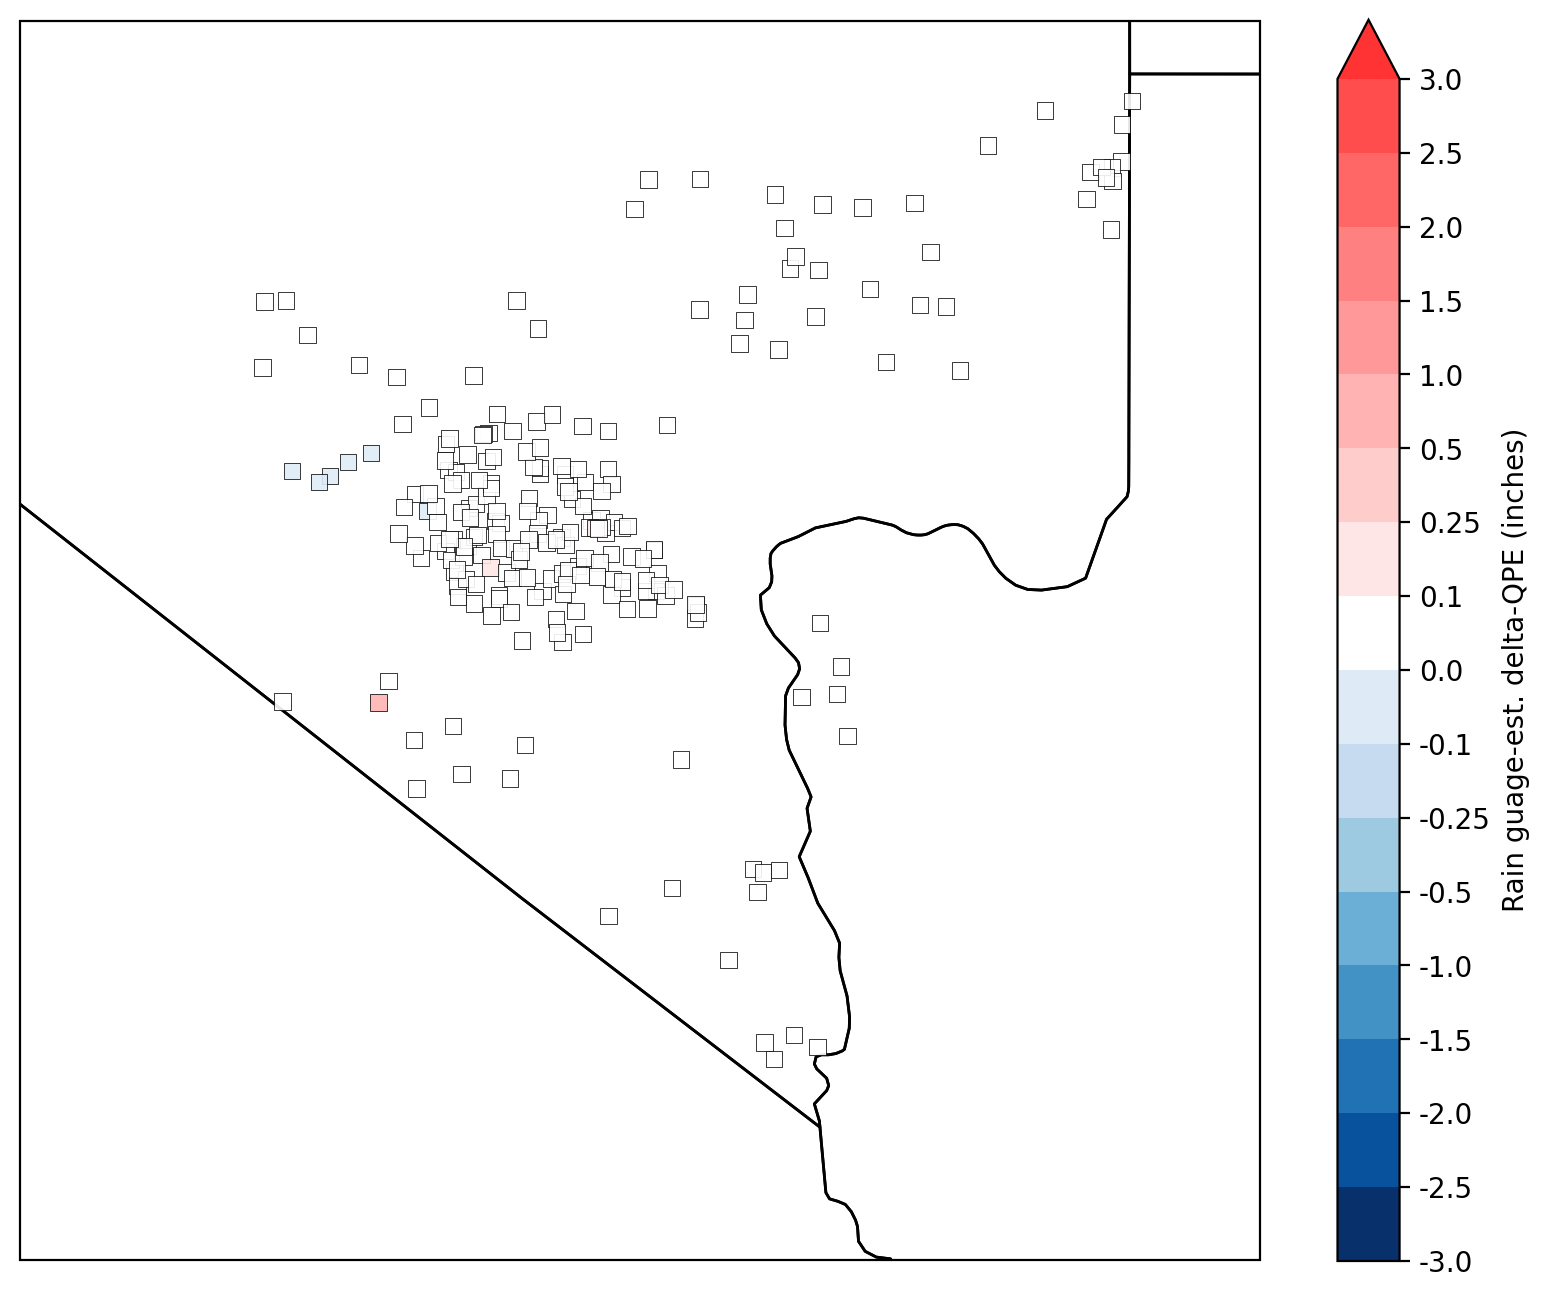

In [41]:
import xarray
from typing import List
from tqdm import tqdm


def get_gauge_mrms_deltas(gpe_raw_vals: List[dict], xarr: xarray.Dataset) -> List[dict]:
    
    lats        = [item["lat"] for item in gpe_raw_vals]
    lons        = [item["lon"] for item in gpe_raw_vals]
    station_ids = [item["station_id"] for item in gpe_raw_vals]
    qpes        = [item["qpe"] for item in gpe_raw_vals]

    # slice to region to save time during search
    _xarr = xarr.sel(
        latitude=slice(gp._LAT_MAX, gp._LAT_MIN),
        longitude=slice(gp._LON_MIN + 360, gp._LON_MAX + 360)
    )

    grid_lats = _xarr['latitude'].values
    grid_lons = _xarr['longitude'].values

    # mm -> inch
    qpe_values = _xarr['unknown'].values / 25.4

    lats = np.array(lats)
    lons = np.array(lons)

    lat_indices = np.abs(grid_lats[:, None] - lats).argmin(axis=0)
    lon_indices = np.abs(grid_lons[:, None] - lons).argmin(axis=0)

    # get closest MRMS grid cell; read QPE value
    deltas = []
    for i, station_id in enumerate(station_ids):

        gauge_qpe = qpes[i]
        mrms_qpe  = qpe_values[lat_indices[i], lon_indices[i]]
        delta_qpe = gauge_qpe - float(mrms_qpe)

        # print(f"station id: {station_id} | delta: {delta_qpe}")

        deltas.append({
            "station_id": station_id,
            "mrms_qpe": mrms_qpe,
            "gauge_qpe": gauge_qpe,
            "delta_qpe": delta_qpe,
            "lat": lats[i],
            "lon": lons[i],
        })

    return deltas


def plot_delta_ccrfcd(gp: CCRFCDGriddedProducts, deltas: List[dict], dpi=200) -> None:
    
    colors = [
        "#08306B",
        "#08519C",
        "#2171B5",
        "#4292C6",
        "#6BAED6",
        "#9ECAE1",
        "#C6DBEF",
        "#DEEBF7",
        "#FFFFFF",
        "#FFE6E6",
        "#FFCCCC",
        "#FFB3B3",
        "#FF9999",
        "#FF8080",
        "#FF6666",
        "#FF4D4D",
        "#FF3333",
    ]
    boundaries = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, -0.25, -0.1, 0.0, 0.1, 0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
    cmap       = mcolors.ListedColormap(colors)
    norm       = mcolors.BoundaryNorm(boundaries, cmap.N, extend='max')

    g_lons = []
    g_lats = []
    g_vals = []
    g_ids  = []

    for item in deltas:

        g_lons.append(item["lon"])
        g_lats.append(item["lat"])
        g_vals.append(item["delta_qpe"])
        g_ids.append(item["station_id"])

    fig = plt.figure(figsize=(10, 10), dpi=dpi) 
    ax  = plt.axes(projection=ccrs.PlateCarree())

    # bound to LV valley
    ax.set_extent([gp._LON_MIN, gp._LON_MAX, gp._LAT_MIN, gp._LAT_MAX], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    sc = ax.scatter(
        g_lons,
        g_lats,
        c=g_vals,
        cmap=cmap,
        norm=norm,
        edgecolors="black",
        linewidths=0.30,
        s=35,
        alpha=.90,
        marker='s',
        transform=ccrs.PlateCarree(),
        zorder=5
    )

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.806, pad=0.05)
    cbar.set_label('Rain guage-est. delta-QPE (inches)')
    cbar.set_ticks(boundaries)
    cbar.set_ticklabels([str(b) for b in boundaries])
       
    plt.show()
    
    
deltas = get_gauge_mrms_deltas(gpe_raw_vals, xarr)
plot_delta_ccrfcd(gp, deltas)

# Per-Event Analysis
---

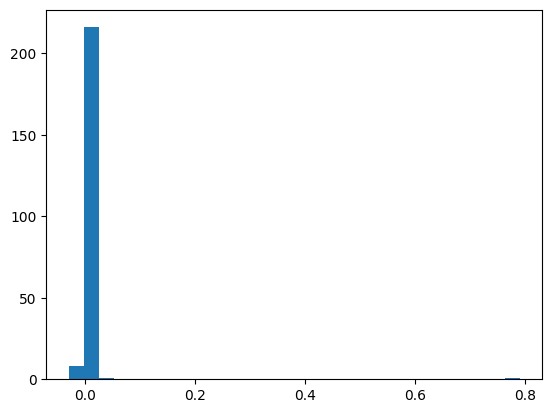

In [50]:
delta_vals = [item['delta_qpe'] for item in deltas]
plt.hist(delta_vals, bins=30);

In [ ]:
from datetime import timedelta

event_deltas = []

for hour in [2, 3, 4, 5, 6, 7, 8, 9, 10]:

    t0           = datetime(year=2023, month=8, day=21, hour=hour)
    t0_1         = t0 + timedelta(hours=1)

    t1           = t0 - timedelta(hours=7)
    t1_1         = t0 - timedelta(hours=6)

    gpe_raw_vals = gp._fetch_all_gauge_qpe(t1, t1_1)

    # PDT (UTC -7) -> UTC
    xarr = client.fetch_radar_only_qpe_1hr(end_time=t0_1, time_zone="UTC")
    deltas = get_gauge_mrms_deltas(gpe_raw_vals, xarr)

    event_deltas.append(deltas)

In [67]:
mrms_qpes  = []
delta_qpes = []
gauge_qpes = []

for event in event_deltas:
    for item in event:
        delta_qpes.append(item['delta_qpe'])
        mrms_qpes.append(item['mrms_qpe'])
        gauge_qpes.append(item['gauge_qpe'])

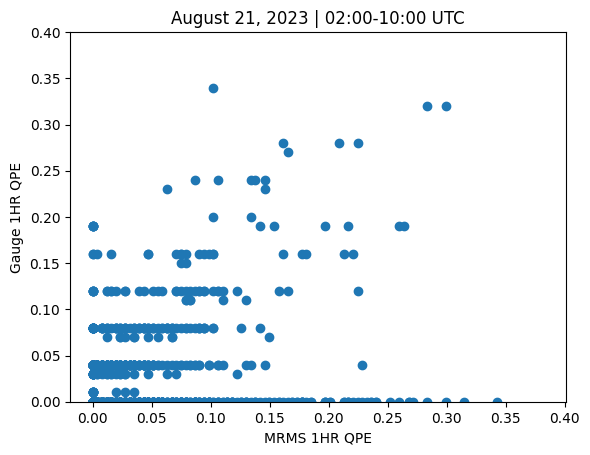

In [70]:
plt.ylim(0.00, 0.40)
plt.xlabel("MRMS 1HR QPE")
plt.ylabel("Gauge 1HR QPE")
plt.title(f"August 21, 2023 | 02:00-10:00 UTC")
plt.scatter(mrms_qpes, gauge_qpes);
plt.show();

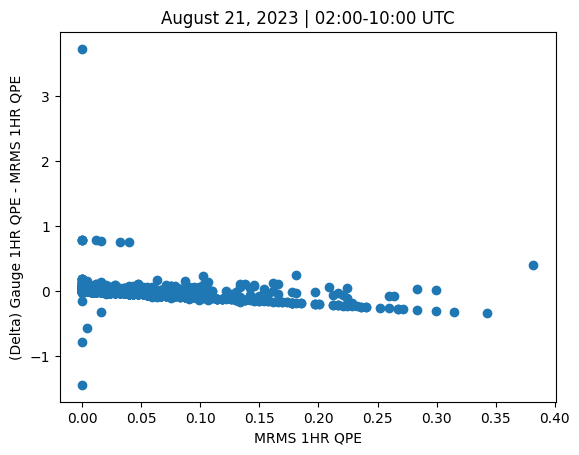

In [69]:
plt.xlabel("MRMS 1HR QPE")
plt.ylabel("(Delta) Gauge 1HR QPE - MRMS 1HR QPE")
plt.title(f"August 21, 2023 | 02:00-10:00 UTC")
plt.scatter(mrms_qpes, delta_qpes);
plt.show();

In [49]:
gauge_qpes

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.009999999999999787,
 0.0,
 0.1200000000000001,
 0.0,
 0.0,
 0.1200000000000001,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03999999999999959,
 0.03999999999999959,
 0.0,
 0.0,
 0.03999999999999959,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08000000000000007,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.02999999999999936,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.040000000000000036,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.040000000000000036,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08000000000000007,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.040000000000000036,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 